In [1]:
!pip install n2v

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.3/210.3 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6

In [2]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 70.8 MB/s eta 0:00:00


=== Median Filter Denoising ===
PSNR: 26.09
SSIM: 0.7317
MSE : 0.002459

=== Wavelet Denoising ===
PSNR: 26.26
SSIM: 0.7127
MSE : 0.002368


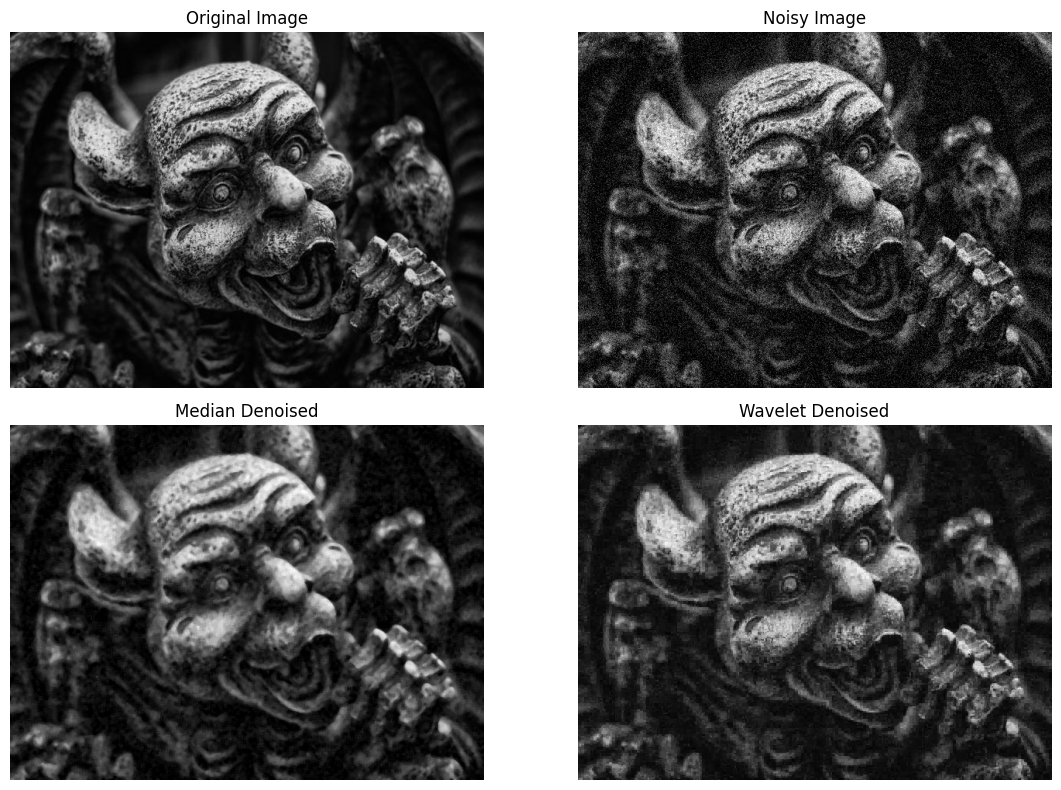

In [3]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import restoration, metrics
from skimage.util import random_noise

# ---------------------------
# 1. Load the Image
# ---------------------------
img = cv2.imread('/content/devil_image.jpg', cv2.IMREAD_GRAYSCALE)

# Check if image is loaded
if img is None:
    raise ValueError("Image not found. Please check the filename or path.")

# Normalize the image (scale between 0-1)
img = img / 255.0

# ---------------------------
# 2. Add Artificial Gaussian Noise
# ---------------------------
noisy_img = random_noise(img, mode='gaussian')

# ---------------------------
# 3. Apply Denoising Techniques
# ---------------------------

# Median Filter (OpenCV expects 8-bit, then scale back to 0-1)
median_denoised = cv2.medianBlur((noisy_img * 255).astype(np.uint8), 5) / 255.0

# Wavelet Denoising (channel_axis=None is correct for grayscale images)
wavelet_denoised = restoration.denoise_wavelet(noisy_img, mode='soft', wavelet_levels=3, channel_axis=None)

# ---------------------------
# 4. Evaluate Metrics (PSNR, SSIM, MSE)
# ---------------------------

# Median Filter Metrics
psnr_median = metrics.peak_signal_noise_ratio(img, median_denoised)
ssim_median = metrics.structural_similarity(img, median_denoised, data_range=1.0)
mse_median = metrics.mean_squared_error(img, median_denoised)

# Wavelet Filter Metrics
psnr_wavelet = metrics.peak_signal_noise_ratio(img, wavelet_denoised)
ssim_wavelet = metrics.structural_similarity(img, wavelet_denoised, data_range=1.0)
mse_wavelet = metrics.mean_squared_error(img, wavelet_denoised)

# ---------------------------
# 5. Print Results
# ---------------------------
print("=== Median Filter Denoising ===")
print(f"PSNR: {psnr_median:.2f}")
print(f"SSIM: {ssim_median:.4f}")
print(f"MSE : {mse_median:.6f}\n")

print("=== Wavelet Denoising ===")
print(f"PSNR: {psnr_wavelet:.2f}")
print(f"SSIM: {ssim_wavelet:.4f}")
print(f"MSE : {mse_wavelet:.6f}")

# ---------------------------
# 6. Display Images
# ---------------------------

titles = ['Original Image', 'Noisy Image', 'Median Denoised', 'Wavelet Denoised']
images = [img, noisy_img, median_denoised, wavelet_denoised]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.1112
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0907
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0696
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0849
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0732
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0661
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0708
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0698
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0648
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0649
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step


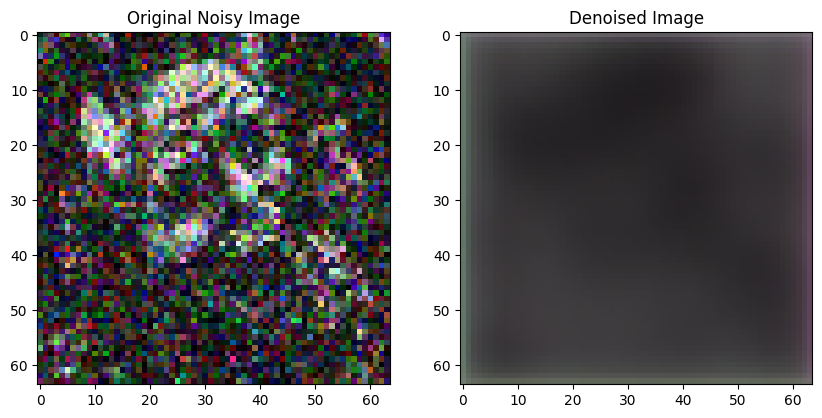

PSNR: 11.847773778474819, SSIM: 0.0346028628895777, MSE: 0.06534654374060041


In [4]:
import numpy as np
import cv2
import tensorflow as tf
from skimage import io
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error as mse

# Step 1: Load your clean image and add noise to it

def add_noise(image, noise_factor=0.3):
    """Add Gaussian noise to the image."""
    noisy_image = image + noise_factor * np.random.randn(*image.shape)
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip to valid pixel range
    return noisy_image

# Load your clean image
image = io.imread('devil_image.jpg')  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Normalize the image to float32 for TensorFlow
image = np.asarray(image, dtype=np.float32) / 255.0

# Add noise to the image
noisy_image = add_noise(image)

# Step 2: Build the Noise2Void Model (Simple U-Net)

def build_n2v_model(input_shape):
    """Build a U-Net-like model for denoising."""
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    outputs = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Step 3: Prepare patches for training

def generate_patches(image, patch_size=64, stride=32):
    """Generate patches from the image for self-supervised learning."""
    patches = []
    for i in range(0, image.shape[0] - patch_size + 1, stride):
        for j in range(0, image.shape[1] - patch_size + 1, stride):
            patch = image[i:i+patch_size, j:j+patch_size]
            mask = np.ones_like(patch)
            mask[patch_size//2, patch_size//2] = 0  # Mask the center pixel
            patches.append((patch, mask))
    return patches

# Generate patches from the noisy image (resize to 64x64 if the image is not already)
noisy_image_resized = cv2.resize(noisy_image, (64, 64))  # Resize to 64x64
patches = generate_patches(noisy_image_resized)
X_train = np.array([patch[0] for patch in patches])
y_train = np.array([patch[0] * patch[1] for patch in patches])  # Apply mask to patches

# Step 4: Train the model

model = build_n2v_model((64, 64, 3))  # Model now accepts 64x64 input size

# Train the model using the generated patches
model.fit(X_train, y_train, epochs=10, batch_size=8)

# Step 5: Evaluate the model

# Ensure the input image is resized to 64x64 before prediction
denoised_image = model.predict(np.expand_dims(noisy_image_resized, axis=0))[0]

# Step 6: Calculate PSNR, SSIM, and MSE

# PSNR Calculation
psnr_value = psnr(noisy_image_resized, denoised_image, data_range=1.0)

# SSIM Calculation
ssim_value = ssim(noisy_image_resized, denoised_image, multichannel=True, win_size=3, channel_axis=-1, data_range=1.0)
# MSE Calculation per channel
mse_value = np.mean([mse(noisy_image_resized[..., i].flatten(), denoised_image[..., i].flatten()) for i in range(noisy_image_resized.shape[2])])

# Step 7: Display the original and denoised images

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Noisy Image")
plt.imshow(noisy_image_resized)
plt.subplot(1, 2, 2)
plt.title("Denoised Image")
plt.imshow(denoised_image)
plt.show()

# Print the evaluation metrics
print(f"PSNR: {psnr_value}, SSIM: {ssim_value}, MSE: {mse_value}")

In [6]:
import os
def extract_frames(video_path, output_folder, frame_interval=1):
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Open video file
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    saved_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Save frame at specified interval
        if frame_count % frame_interval == 0:
            frame_name = f"frame_{saved_count:04d}.jpg"
            cv2.imwrite(os.path.join(output_folder, frame_name), frame)
            saved_count += 1

        frame_count += 1

    cap.release()
    print(f"Extracted {saved_count} frames from {frame_count} total frames")

# Example usage
extract_frames('/content/videoplayback (2).mp4', 'output_frames')

Extracted 317 frames from 317 total frames


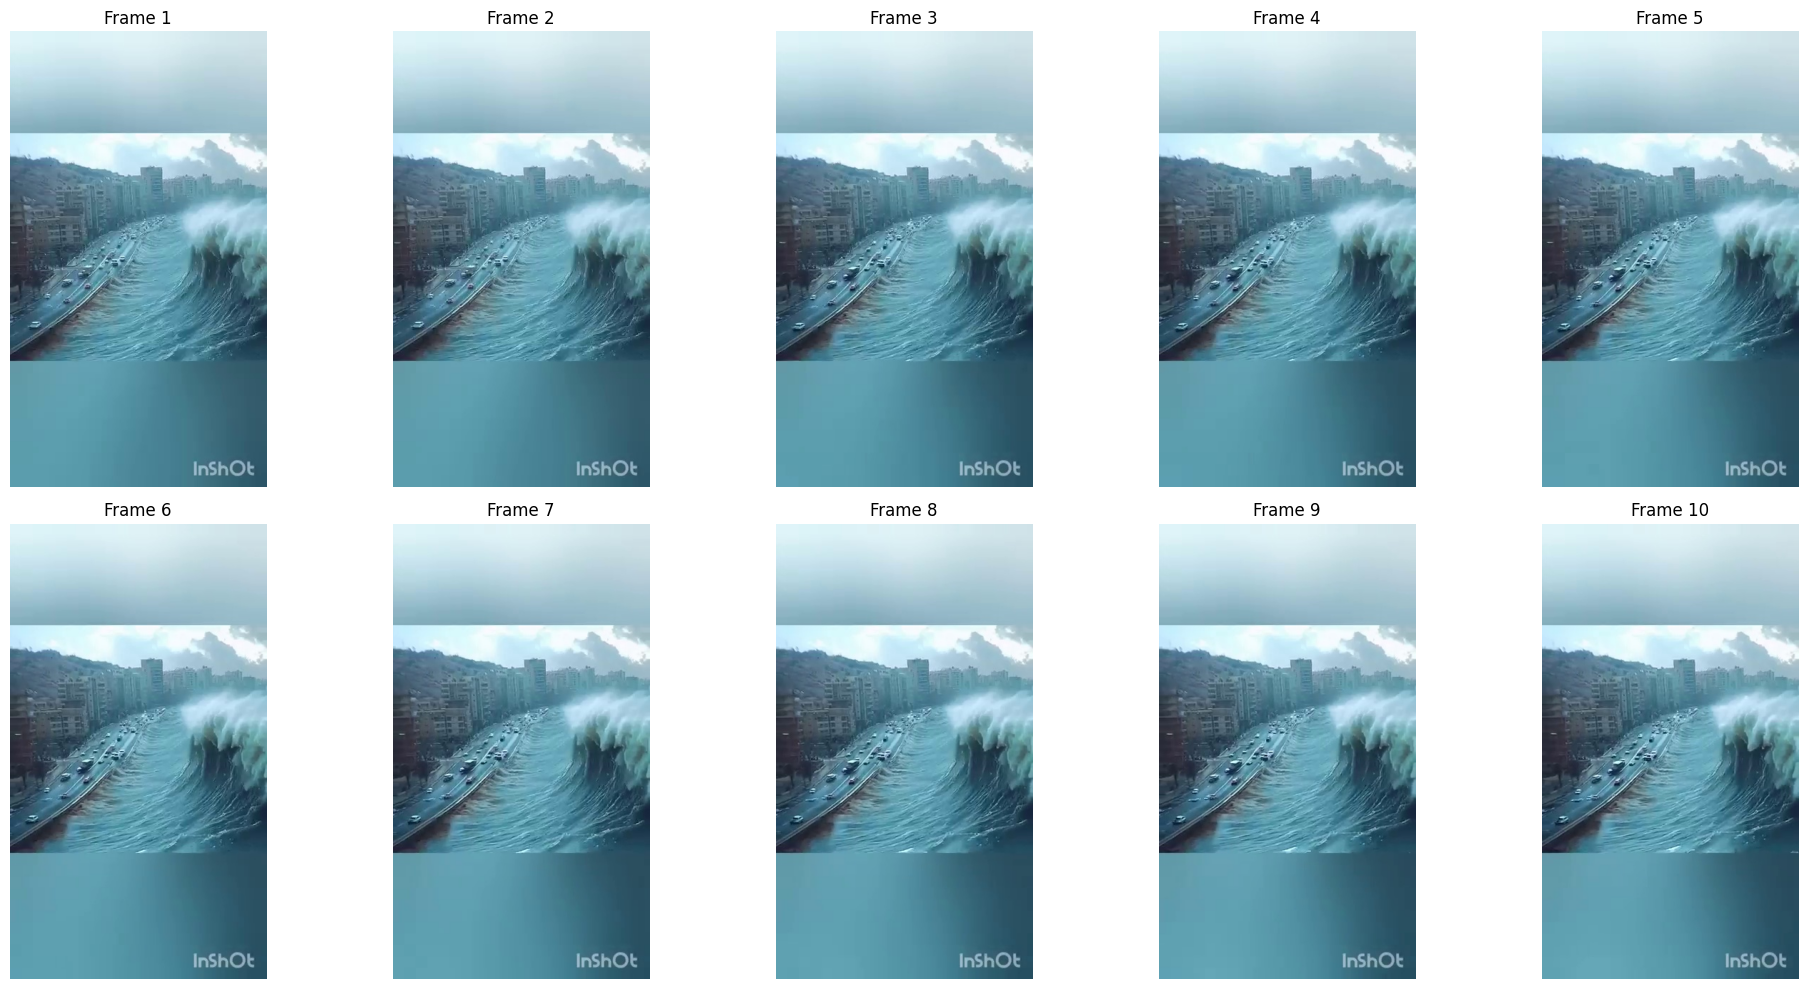

In [7]:

import cv2
import os
import matplotlib.pyplot as plt

def show_first_n_frames(frames_folder, n=10):
    # Get list of frame files sorted by name
    frame_files = sorted([f for f in os.listdir(frames_folder) if f.endswith('.jpg')])

    # Create figure
    plt.figure(figsize=(20, 10))

    # Display first n frames
    for i, frame_file in enumerate(frame_files[:n]):
        frame_path = os.path.join(frames_folder, frame_file)
        frame = cv2.imread(frame_path)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for matplotlib

        plt.subplot(2, 5, i+1)  # 2 rows, 5 columns
        plt.imshow(frame)
        plt.title(f"Frame {i+1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
show_first_n_frames('output_frames', 10)

In [10]:
def process_video(input_path, output_path, operation='threshold'):
    cap = cv2.VideoCapture(input_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Define video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height), isColor=False)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Apply selected operation
        if operation == 'threshold':
            processed = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                           cv2.THRESH_BINARY, 11, 2)
        elif operation == 'gaussian':
            processed = cv2.GaussianBlur(gray, (5, 5), 0)
        elif operation == 'canny':
            processed = cv2.Canny(gray, 100, 200)
        elif operation == 'bitwise_not':
            processed = cv2.bitwise_not(gray)

        # Write processed frame
        out.write(processed)

    cap.release()
    out.release()
    print(f"Processed video saved to {output_path}")

# Example usage
process_video('/content/videoplayback.mp4', 'threshold_output.mp4', 'threshold')
process_video('/content/videoplayback.mp4', 'gaussian_output.mp4', 'gaussian')
process_video('/content/videoplayback.mp4', 'canny_output.mp4', 'canny')
process_video('/content/videoplayback.mp4', 'bitwise_output.mp4', 'bitwise_not')


Processed video saved to threshold_output.mp4
Processed video saved to gaussian_output.mp4
Processed video saved to canny_output.mp4
Processed video saved to bitwise_output.mp4


In [11]:
def create_collage(video_path, output_path, grid_size=(3, 3)):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames_to_select = grid_size[0] * grid_size[1]
    step = max(1, total_frames // frames_to_select)

    selected_frames = []
    for i in range(frames_to_select):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i * step)
        ret, frame = cap.read()
        if ret:
            selected_frames.append(frame)

    cap.release()

    if len(selected_frames) < frames_to_select:
        print(f"Warning: Only got {len(selected_frames)} frames, expected {frames_to_select}")
        grid_size = (int(np.sqrt(len(selected_frames))), int(np.sqrt(len(selected_frames))))

    # Resize frames to same size
    h, w = selected_frames[0].shape[:2]
    resized_frames = [cv2.resize(f, (w//2, h//2)) for f in selected_frames]

    # Create collage
    rows = []
    for i in range(grid_size[0]):
        row = np.hstack(resized_frames[i*grid_size[1]:(i+1)*grid_size[1]])
        rows.append(row)

    collage = np.vstack(rows)
    cv2.imwrite(output_path, collage)
    print(f"Collage saved to {output_path}")

# Example usage
create_collage('/content/videoplayback (2).mp4', '/content/collage.jpg')

Collage saved to /content/collage.jpg


🎬 Task 2: Video Classification (CNN + LSTM)

In [ ]:
import os
import cv2
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model,to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
seed_c=20
np.random.seed(seed_c)
random.seed(seed_c)
tf.random.set_seed(seed_c)

In [ ]:
%%capture
!wget --no-check-certificate https://www.crcv.ucf.edu/data/UCF101/UCF101.rar
!unrar x UCF101.rar

Total no of class:101


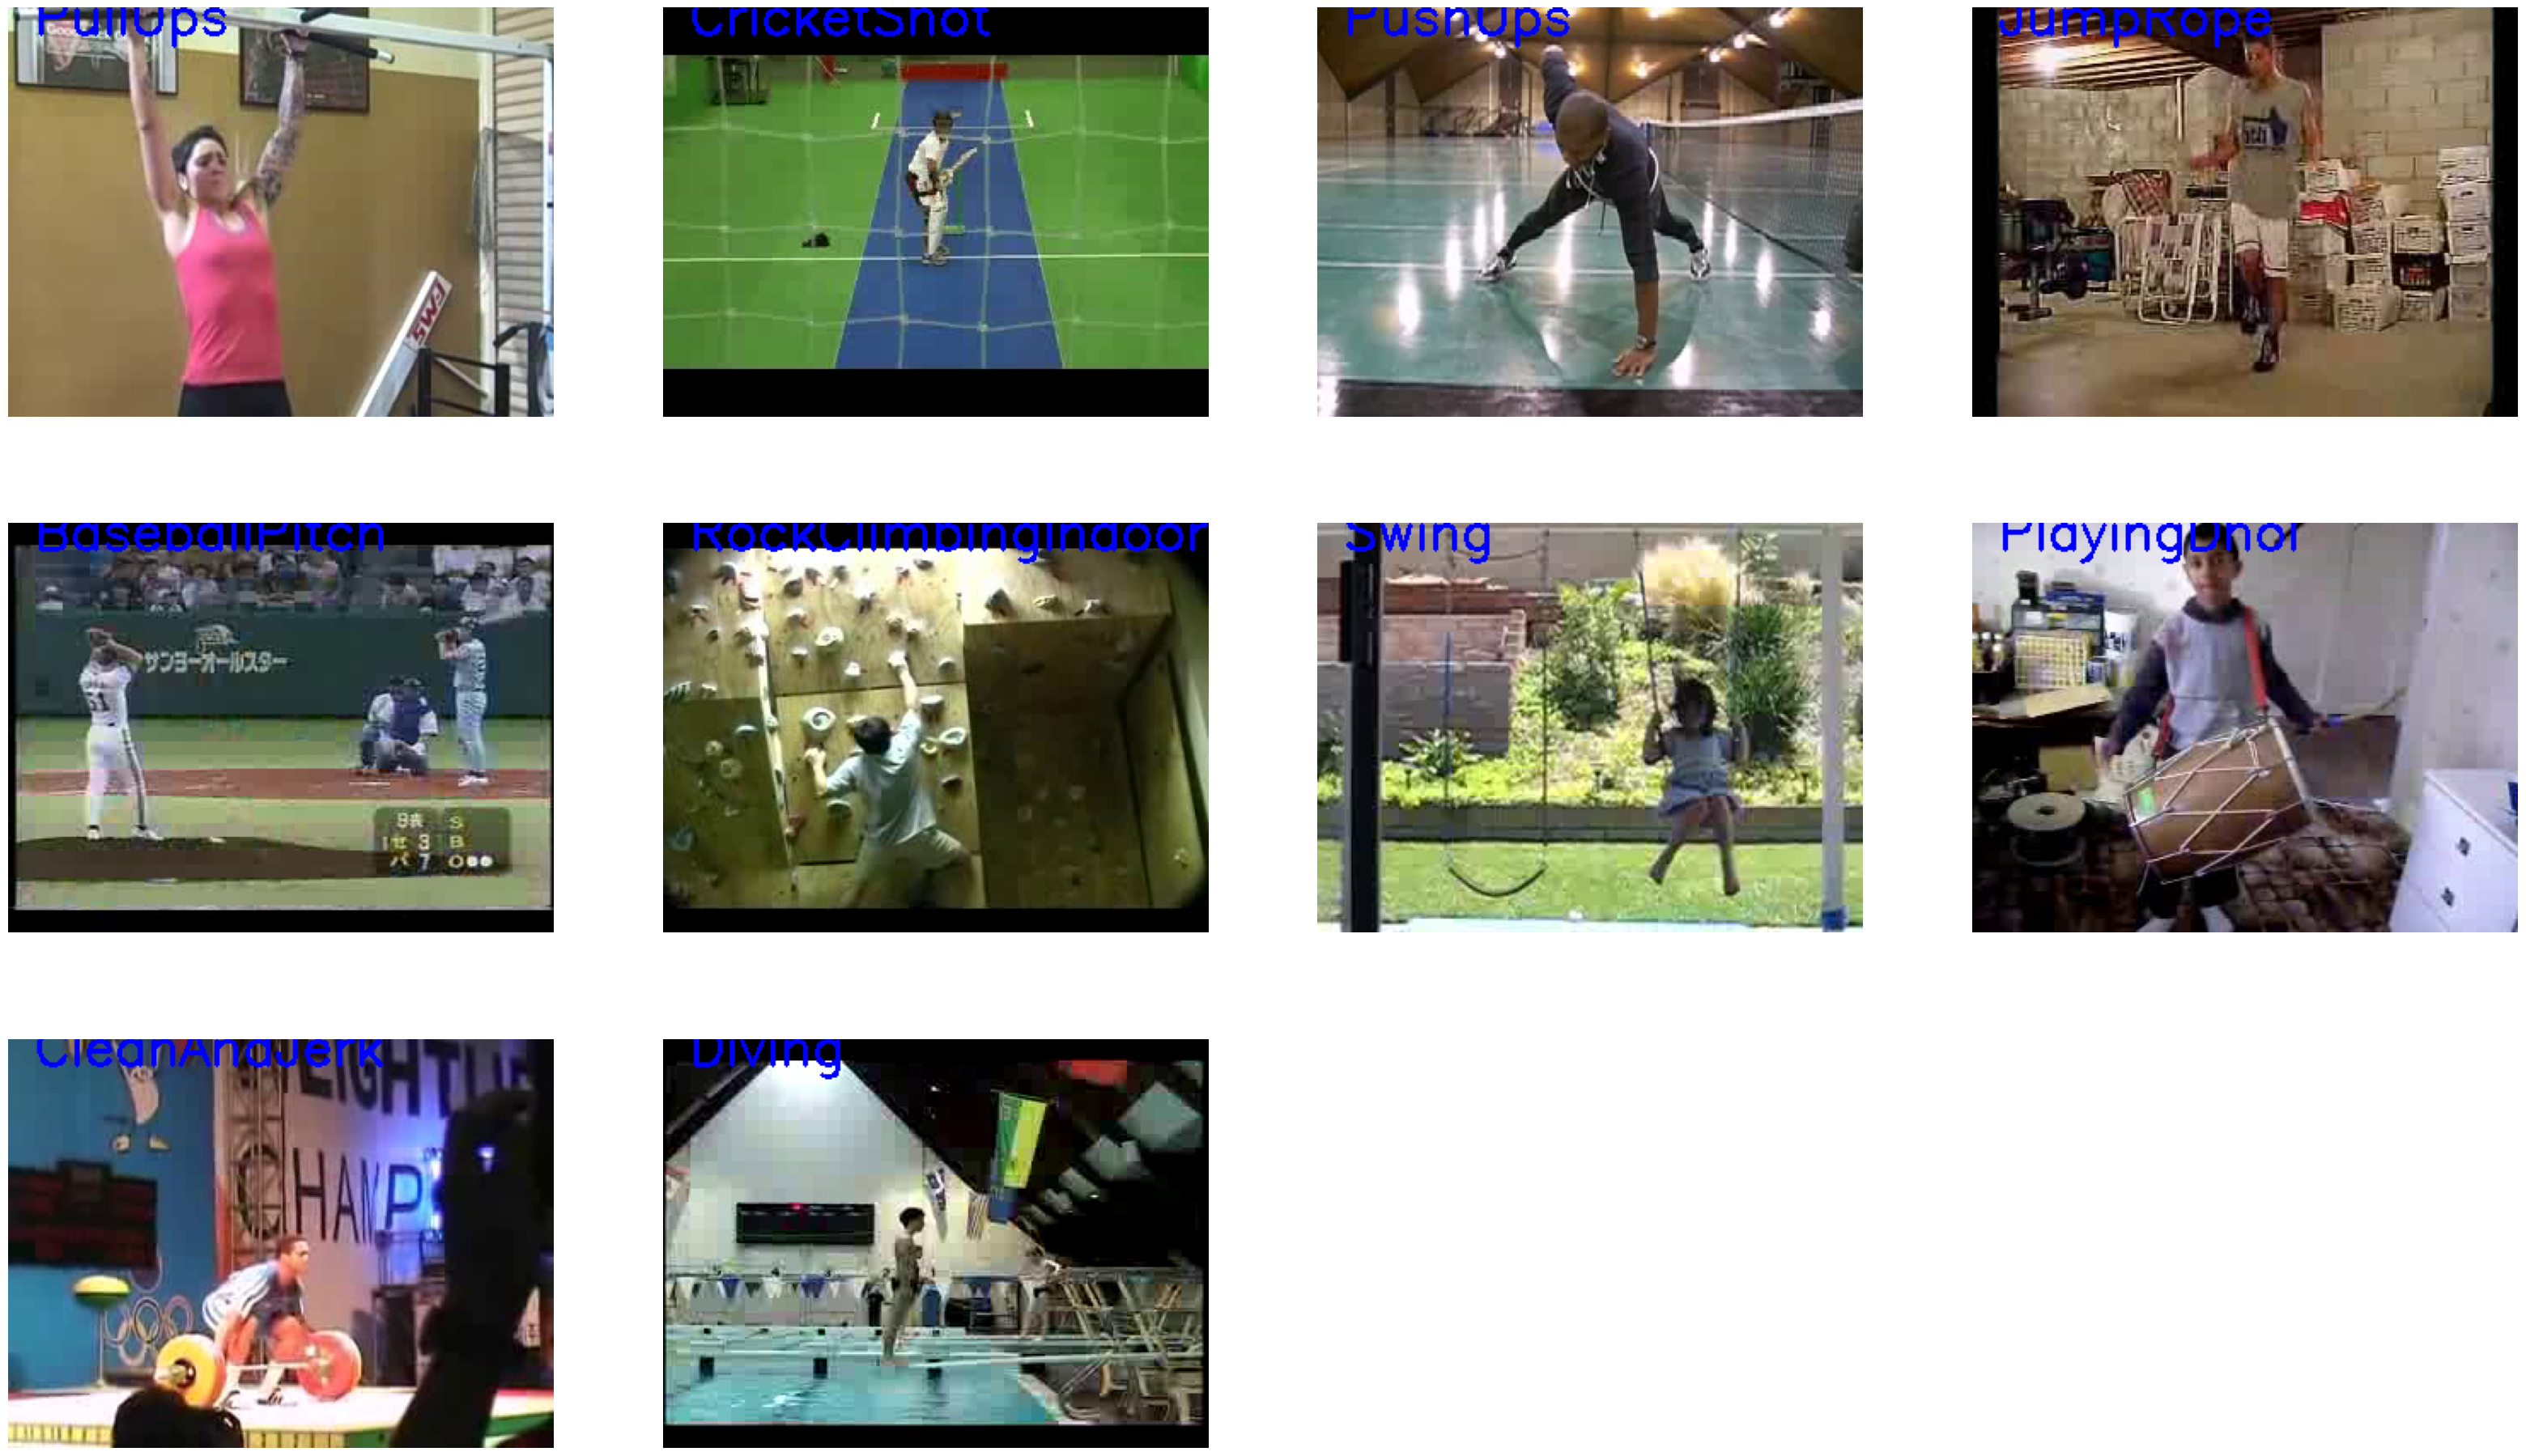

In [ ]:
plt.figure(figsize=(40,40))
class_names=os.listdir('UCF-101')
print(f'Total no of class:{len(class_names)}')
rand_range=random.sample(range(len(class_names)),10)#taking random 20 classes
for count,index in enumerate(rand_range,1):
  # print(f'{count}/  /{index}')
  select_class_name=class_names[index]
  video_file_list=os.listdir(f'UCF-101/{select_class_name}')
  video_file_name=random.choice(video_file_list)
  video_reader=cv2.VideoCapture(f'UCF-101/{select_class_name}/{video_file_name}')
  dummy,bgr_frame=video_reader.read()
  video_reader.release()
  rgb_frame=cv2.cvtColor(bgr_frame,cv2.COLOR_BGR2RGB)
  cv2.putText(rgb_frame,select_class_name,(15,15),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
  plt.subplot(5,4,count);plt.imshow(rgb_frame);plt.axis('off')

In [ ]:
#setting parameters
height,width=112,112
seq_len=20
dataset_dir='UCF-101'
target_class= ['Basketball', 'Biking', 'PlayingGuitar', 'Typing', 'JumpRope']
print(target_class)

['Basketball', 'Biking', 'PlayingGuitar', 'Typing', 'JumpRope']


In [ ]:
def frame_extraction(path):
  frame_list=[]
  cap=cv2.VideoCapture(path)
  frame_count=int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  skip_frame_window=max(int(frame_count/seq_len),1)
  for counter in range(seq_len):
    cap.set(cv2.CAP_PROP_FRAME_COUNT,counter*skip_frame_window)
    success,frame=cap.read()
    if not success:
      break
    resize_img=cv2.resize(frame,(height,width))
    normalize_img=resize_img/255
    frame_list.append(normalize_img)
  cap.release()
  return frame_list

In [ ]:
def create_dataset():
  features = []
  labels = []
  video_path = []
  for index, name in enumerate(target_class):
    print(f'Extracting data of class: {name}')
    file_list = os.listdir(os.path.join(dataset_dir, name))

    # Initialize a counter for each class
    class_counter = 0

    for file_name in file_list:
      if class_counter >= 25:  # Break if we have 10 videos for this class
        break

      path = os.path.join(dataset_dir, name, file_name)
      frames = frame_extraction(path)
      if len(frames) == seq_len:
        features.append(frames)
        labels.append(index)
        video_path.append(path)
        class_counter += 1  # Increment the counter for this class

  features = np.asarray(features)
  labels = np.array(labels)
  return features, labels, video_path

In [ ]:
#Extractng dataset depend on target class
features,labels,video_path=create_dataset()
one_hot_encoded_label=to_categorical(labels)

Extracting data of class: Basketball
Extracting data of class: Biking
Extracting data of class: PlayingGuitar
Extracting data of class: Typing
Extracting data of class: JumpRope


In [ ]:
feature_train,feature_test,label_train,label_test=train_test_split(features,one_hot_encoded_label,test_size=0.2,shuffle=True,random_state=seed_c)


In [ ]:
num_of_class=5

In [ ]:
model=Sequential()
##################################
model.add(TimeDistributed(Conv2D(16,(3,3),padding='same',activation='relu',input_shape=(seq_len,height,width,3))))
model.add(TimeDistributed(MaxPooling2D(4,4)))
model.add(TimeDistributed(Dropout(0.2)))

model.add(TimeDistributed(Conv2D(32,(3,3),padding='same',activation='relu')))
model.add(TimeDistributed(MaxPooling2D(4,4)))
model.add(TimeDistributed(Dropout(0.2)))

model.add(TimeDistributed(Conv2D(64,(3,3),padding='same',activation='relu')))
model.add(TimeDistributed(MaxPooling2D(2,2)))
model.add(TimeDistributed(Dropout(0.2)))

model.add(TimeDistributed(Conv2D(64,(3,3),padding='same',activation='relu')))
model.add(TimeDistributed(MaxPooling2D(2,2)))
model.add(TimeDistributed(Dropout(0.2)))

model.add(TimeDistributed(Flatten()))

model.add(LSTM(32))

model.add(Dense(num_of_class,activation='softmax'))

#######################################

model.build(input_shape=(None, seq_len, height, width, 3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_52 (TimeDi  (None, 20, 112, 112, 16)  448      
 stributed)                                                      
                                                                 
 time_distributed_53 (TimeDi  (None, 20, 28, 28, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_54 (TimeDi  (None, 20, 28, 28, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_55 (TimeDi  (None, 20, 28, 28, 32)   4640      
 stributed)                                                      
                                                                 
 time_distributed_56 (TimeDi  (None, 20, 7, 7, 32)    

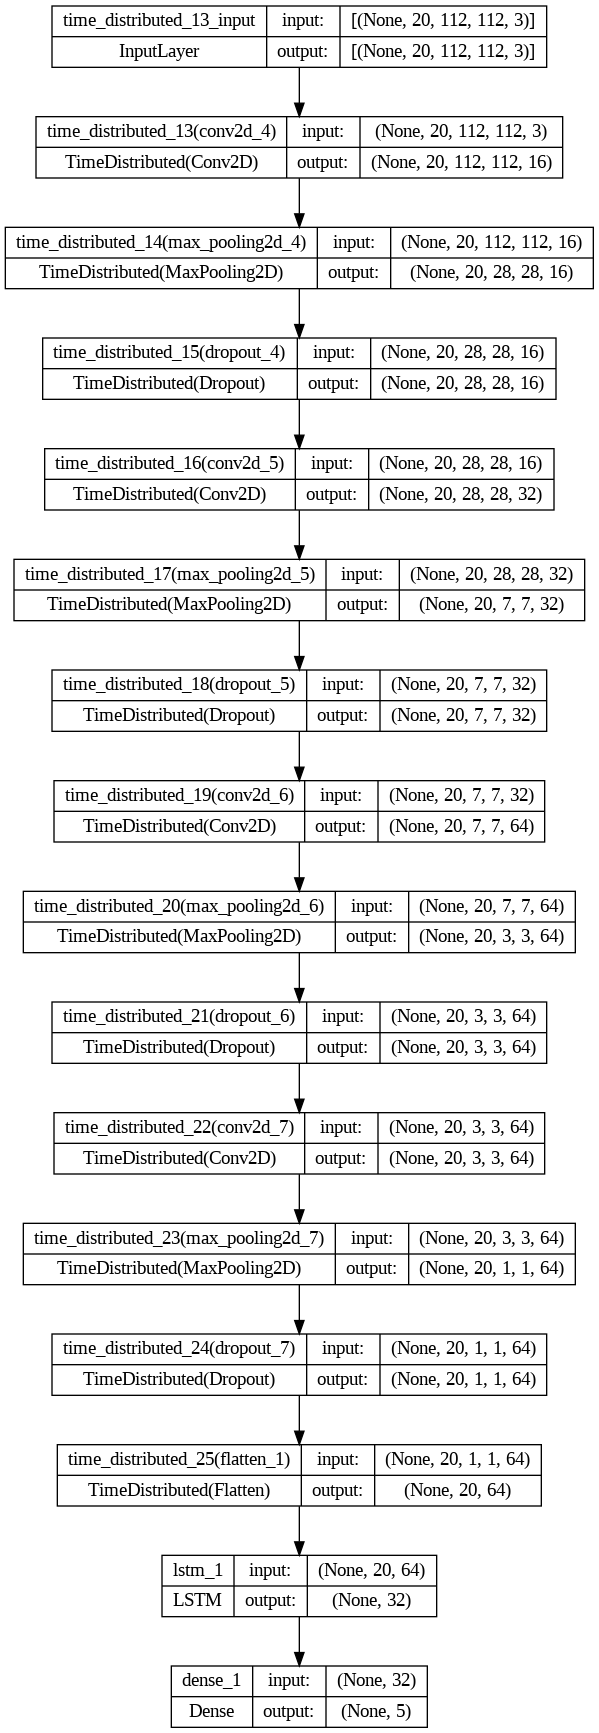

In [ ]:
plot_model(model,to_file='model_view.png',show_shapes=True,show_layer_names=True)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
start_time=time.time()
hist=model.fit(x=feature_train,y=label_train,epochs=25,batch_size=8,shuffle=True,validation_split=0.2)
end_time=time.time()
print(f'Training time is {end_time-start_time} seconds')

Epoch 1/25
10/10 [==============================] - 15s 1s/step - loss: 1.6437 - accuracy: 0.2250 - val_loss: 1.6354 - val_accuracy: 0.1500
Epoch 2/25
10/10 [==============================] - 11s 1s/step - loss: 1.5985 - accuracy: 0.2250 - val_loss: 1.6234 - val_accuracy: 0.1500
Epoch 3/25
10/10 [==============================] - 11s 1s/step - loss: 1.6062 - accuracy: 0.2375 - val_loss: 1.6144 - val_accuracy: 0.1500
Epoch 4/25
10/10 [==============================] - 11s 1s/step - loss: 1.5768 - accuracy: 0.2375 - val_loss: 1.6041 - val_accuracy: 0.1500
Epoch 5/25
10/10 [==============================] - 11s 1s/step - loss: 1.5551 - accuracy: 0.2625 - val_loss: 1.5737 - val_accuracy: 0.1500
Epoch 6/25
10/10 [==============================] - 12s 1s/step - loss: 1.4940 - accuracy: 0.4375 - val_loss: 1.4716 - val_accuracy: 0.4500
Epoch 7/25
10/10 [==============================] - 10s 1s/step - loss: 1.4971 - accuracy: 0.3625 - val_loss: 1.4917 - val_accuracy: 0.5000
Epoch 8/25
10/10 [==

In [ ]:
eval_hist=model.evaluate(feature_test,label_test)

1/1 [==============================] - 1s 1s/step - loss: 1.2248 - accuracy: 0.5200


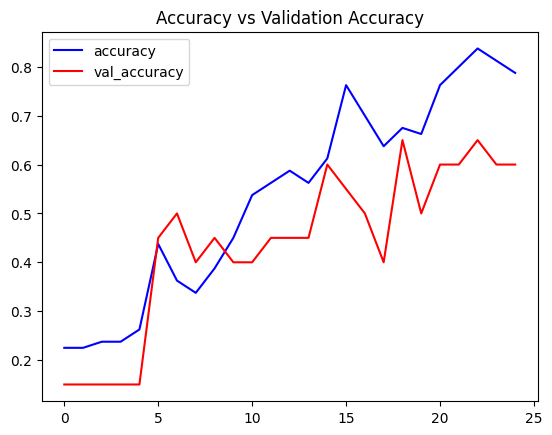

In [ ]:
#ACCURACY
x=hist.history['accuracy']
epochs=range(len(x))
plt.plot(epochs,x,'blue',label='accuracy')
plt.plot(epochs,hist.history['val_accuracy'],'red',label='val_accuracy')
plt.title('Accuracy vs Validation Accuracy')
plt.legend()

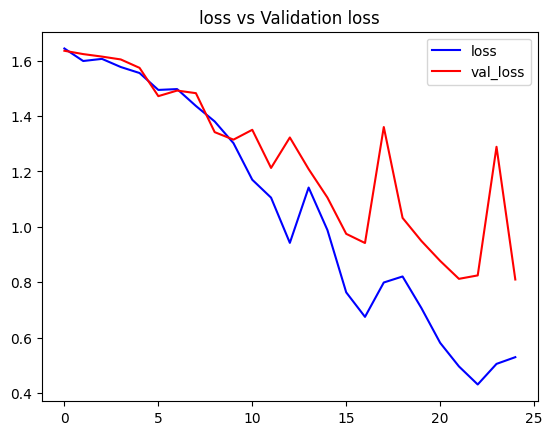

In [ ]:
#LOSS
x=hist.history['loss']
epochs=range(len(x))
plt.plot(epochs,x,'blue',label='loss')
plt.plot(epochs,hist.history['val_loss'],'red',label='val_loss')
plt.title('loss vs Validation loss')
plt.legend()

In [ ]:
#CONFUSION MATRIX & CLASSIFICATION REPORT
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred=model.predict(feature_test)
y_pred_class=np.argmax(y_pred,axis=1)
y_actual=np.argmax(label_test,axis=1)
cm=confusion_matrix(y_pred_class,y_actual)
print("Confusion matrix")
print(cm)
cr=classification_report(y_pred_class,y_actual)
print("Classification report")
print(cr)

1/1 [==============================] - 2s 2s/step
Confusion matrix
[[1 4 0 0 0]
 [0 0 0 1 2]
 [0 1 8 1 0]
 [0 0 0 3 0]
 [3 0 0 0 1]]
Classification report
              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.00      0.00      0.00         3
           2       1.00      0.80      0.89        10
           3       0.60      1.00      0.75         3
           4       0.33      0.25      0.29         4

    accuracy                           0.52        25
   macro avg       0.44      0.45      0.43        25
weighted avg       0.58      0.52      0.54        25

